In [1]:
import pandas as pd
from itertools import combinations
import math
import numpy as np
import statistics
from itertools import permutations
from bioinfokit import analys, visuz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
from matplotlib_venn import venn2
import copy
import random
from vst_function import *
from stattools.resampling import PermutationTest

In [2]:
#pd.set_option('display.max_rows', 400)
data = pd.read_csv("../data/cnvator_data_sudmant_overlapped.csv")


anotation = pd.read_csv('../data/SGDP_anotation.csv', sep=',', encoding='latin-1',  index_col=1)

distribution = data[data['LENGHT'] < 200000]

In [3]:
cnv = data.pivot_table(index=["Chr", "Start", "End"], 
                    columns='Sample_ID', 
                    values='RD').reset_index()
cnv#.loc[cnv['Chr'] == '8']


Sample_ID,Chr,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,...,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
0,1,228416,267160,2.089230,1.098060,1.088959,1.945120,1.743018,1.263408,1.821840,...,1.991660,0.782568,1.862735,0.739641,1.551208,2.087340,0.971431,1.032574,1.820703,1.947480
1,1,471226,471326,0.187758,0.795844,0.089448,0.000136,0.002116,0.001990,0.314463,...,0.000102,0.076837,0.038285,0.003255,0.063427,0.000687,0.289939,0.088507,0.000452,0.000258
2,1,712534,763301,1.594500,2.104280,NaN,NaN,NaN,NaN,NaN,...,2.375680,1.975707,2.407905,2.219840,2.307095,2.417060,2.417685,2.628050,NaN,NaN
3,1,763301,763482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,769541,787076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,X,154776475,154788811,NaN,NaN,NaN,NaN,NaN,0.199081,NaN,...,NaN,NaN,NaN,NaN,2.199430,NaN,NaN,NaN,NaN,NaN
8646,X,154788811,154840186,NaN,0.563718,0.062768,0.118046,0.097334,NaN,0.096356,...,0.014918,NaN,0.120846,NaN,2.199430,0.167378,NaN,NaN,0.076623,0.315173
8647,X,154789310,154826421,NaN,0.563718,0.062768,0.118046,0.097334,NaN,0.096356,...,0.014918,NaN,0.120846,NaN,2.199430,0.167378,NaN,NaN,0.076623,0.315173
8648,X,154892549,154908191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.199430,NaN,NaN,NaN,NaN,NaN


In [4]:
coordinates = cnv.iloc[:,0:2]

cnvs = cnv.iloc[:,3:284]
cnvs = cnvs.T
cnvs = cnvs.fillna(2)
cnvs

,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
Sample_ID,,,,,,,,,,,,,,,,,,,,,
LP6005441-DNA_A01,2.089230,0.187758,1.594500,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,2.000000
LP6005441-DNA_A03,1.098060,0.795844,2.104280,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.563718,0.563718,2.0,0.532579
LP6005441-DNA_A04,1.088959,0.089448,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.062768,0.062768,2.0,2.000000
LP6005441-DNA_A05,1.945120,0.000136,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,1.61902,2.000000,2.000000,2.0,2.0,0.118046,0.118046,2.0,2.000000
LP6005441-DNA_A06,1.743018,0.002116,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.097334,0.097334,2.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS6004476,2.087340,0.000687,2.417060,2.0,2.0,2.0,1.46004,2.0,2.0,0.401630,...,2.00000,2.00000,0.162154,0.162154,2.0,2.0,0.167378,0.167378,2.0,2.000000
SS6004477,0.971431,0.289939,2.417685,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,0.009885
SS6004478,1.032574,0.088507,2.628050,2.0,2.0,2.0,2.00000,2.0,2.0,0.307040,...,0.53303,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,0.001413


In [5]:
features = anotation.loc[:,["7-Gender","10-Region", "11-Country",]]
dt = features.merge(cnvs, left_index=True, right_index=True)
dt


,7-Gender,10-Region,11-Country,0,1,2,3,4,5,6,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
LP6005443-DNA_B06,F,WestEurasia,Iceland,0.817642,0.001244,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.561189,0.561189,2.0,0.562057
LP6005442-DNA_D08,F,WestEurasia,Iceland,1.859167,0.000993,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.059140,0.059140,2.0,2.000000
LP6005441-DNA_D07,F,SouthAsia,Pakistan,1.179241,0.000969,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.056002,0.056002,2.0,2.000000
LP6005441-DNA_C07,M,SouthAsia,Pakistan,1.655737,0.218862,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.097988,0.097988,2.0,2.000000
LP6005442-DNA_G11,M,Africa,SierraLeone,1.843697,0.014349,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,2.000000,2.000000,2.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP6005441-DNA_H10,F,WestEurasia,Russia,1.012276,0.104367,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.57277,2.0,2.0,2.000000,0.061954,0.061954,2.0,2.000000
LP6005519-DNA_A06,M,EastAsia,Myanmar,1.066221,0.026512,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,2.000000,2.000000,2.0,0.000000
LP6005519-DNA_B06,M,EastAsia,Myanmar,1.153741,0.077673,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.120404,0.120404,2.0,2.000000
LP6005441-DNA_B08,F,Africa,Congo,1.471292,0.069253,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,0.010136,2.000000,2.000000,2.0,2.000000


In [13]:
####### Groupby regions #######
dt_group = dt.groupby('10-Region')

dt_groupped = []
regions = anotation['10-Region'].unique()
for i in regions:
    dt_groupped.append(dt_group.get_group(str(i)))
    

#### Names to pair-population
regions = dt['10-Region'].unique()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])

In [9]:
## VST for pair-population
vst_dt = []

combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for region in combination_regions:
        statistic = vst((dt_groupped[region[0]]), (dt_groupped[region[1]]))
        vst_dt.append(statistic)

vst_dt = pd.DataFrame(vst_dt).set_axis(combination_names)
#vst_dt = vst_dt.T
vst_dt

/Users/luciabazan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/vst_function.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  vt = pd.concat([x,y]).var()
/Users/luciabazan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ret

/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/vst_function.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  vt = pd.concat([x,y]).var()
/Users/luciabazan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/vst_function.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  vt = pd.concat([x,y]).v

,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
WestEurasia-SouthAsia,0.008884,0.016558,0.014467,0.013534,0.010292,0.034538,0.017628,0.014344,0.014477,0.027724,...,0.011303,0.023300,0.014483,0.010429,0.017239,0.008850,0.008859,0.008850,0.013514,0.009187
WestEurasia-Africa,0.015886,0.086130,0.053381,0.013514,0.008485,NaN,0.013514,0.018990,0.018990,0.009505,...,0.031610,0.024074,0.031904,0.023734,0.017536,0.032649,0.057872,0.056645,0.015818,0.020068
WestEurasia-CentralAsiaSiberia,0.033260,0.010014,0.020774,0.034423,0.013267,0.037037,0.028291,0.023660,0.023660,0.010663,...,0.011309,0.021119,0.010489,0.010033,0.016405,0.017178,0.018272,0.018560,0.013514,0.015872
WestEurasia-Oceania,0.042020,0.018624,0.026426,0.013514,0.016186,NaN,0.031798,0.022337,0.013514,0.014405,...,0.010951,0.015257,0.025690,0.020262,0.016164,0.016873,0.159491,0.157031,0.013514,0.133432
WestEurasia-America,0.015877,0.044205,0.047619,0.013514,0.031375,NaN,0.035331,0.013514,0.028320,0.016199,...,0.024736,0.020044,0.028447,0.039858,0.015994,0.016658,0.010662,0.010722,0.018580,0.021417
WestEurasia-EastAsia,0.008413,0.008587,0.012816,0.023858,0.012139,0.035371,0.040967,0.022884,0.014380,0.009201,...,0.032105,0.016105,0.010162,0.008350,0.017648,0.018752,0.012852,0.013118,0.013514,0.008413
SouthAsia-Africa,0.019851,0.125906,0.096191,0.034012,0.013248,0.032879,0.025422,0.015749,0.015713,0.044853,...,0.025641,NaN,0.025641,0.025641,NaN,0.033680,0.060295,0.060295,0.022727,0.027724
SouthAsia-CentralAsiaSiberia,0.046672,0.021525,0.053016,0.024609,0.015773,0.015773,0.017173,0.017173,0.017125,0.059535,...,0.015266,NaN,0.027361,0.016090,NaN,0.025641,0.025743,0.025743,NaN,0.019286
SouthAsia-Oceania,0.057050,0.015914,0.054809,0.031694,0.030873,0.030873,0.018708,0.016706,0.025641,0.068305,...,0.016301,0.041667,0.025641,0.025641,NaN,0.025641,0.191008,0.191008,NaN,0.174469
SouthAsia-America,0.022844,0.079177,0.099500,0.031376,0.030675,0.030599,0.020606,0.025491,0.019655,0.075364,...,0.025641,NaN,0.064214,0.064214,NaN,0.025641,0.016814,0.016814,0.045455,0.033814


In [14]:
## Dmedian for pair-population
dmean_dt = []

combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for region in combination_regions:
        statistic = dmean((dt_groupped[region[0]]), (dt_groupped[region[1]]))
        dmean_dt.append(statistic)

dmean_dt = pd.DataFrame(dmean_dt).set_axis(combination_names)
#vst_dt = vst_dt.T
dmean_dt

/Users/luciabazan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
WestEurasia-SouthAsia,0.005154,0.027705,0.031522,0.009581,0.005572,0.015720,0.009539,0.008197,0.008295,0.082610,...,0.032824,0.054420,0.048906,0.023336,0.029535,0.000198,0.005584,0.001730,0.020722,0.032966
WestEurasia-Africa,0.071960,0.062526,0.080606,0.006800,0.000434,0.000000,0.002624,0.028002,0.028002,0.024464,...,0.081215,0.054420,0.086700,0.061129,0.029535,0.133135,0.412093,0.408239,0.025255,0.192550
WestEurasia-CentralAsiaSiberia,0.141105,0.003711,0.042016,0.030443,0.010137,0.020284,0.017661,0.016318,0.016318,0.022237,...,0.026456,0.054420,0.019270,0.007631,0.029535,0.051226,0.173705,0.177559,0.020722,0.147197
WestEurasia-Oceania,0.198405,0.030035,0.061412,0.006800,0.010148,0.000000,0.019278,0.012846,0.003966,0.057747,...,0.020092,0.038558,0.086700,0.061129,0.029535,0.051226,0.815362,0.811508,0.020722,0.705471
WestEurasia-America,0.078564,0.051447,0.082872,0.006800,0.050821,0.000000,0.021920,0.003966,0.018735,0.069929,...,0.081215,0.054420,0.128702,0.154273,0.029535,0.051226,0.031522,0.035376,0.046493,0.213028
WestEurasia-EastAsia,0.007921,0.004420,0.032905,0.020323,0.009824,0.019972,0.030845,0.016036,0.010721,0.019998,...,0.081215,0.039413,0.028018,0.002448,0.029535,0.051226,0.115097,0.118951,0.020722,0.015290
SouthAsia-Africa,0.066806,0.090231,0.112128,0.016381,0.005138,0.015720,0.012163,0.019805,0.019707,0.107073,...,0.048391,0.000000,0.037794,0.037794,0.000000,0.133333,0.406509,0.406509,0.004533,0.225516
SouthAsia-CentralAsiaSiberia,0.135950,0.031417,0.073538,0.020862,0.004564,0.004564,0.008121,0.008121,0.008024,0.104847,...,0.006369,0.000000,0.068175,0.015705,0.000000,0.051028,0.179290,0.179290,0.000000,0.114231
SouthAsia-Oceania,0.203560,0.002330,0.092934,0.016381,0.015720,0.015720,0.009738,0.004649,0.012261,0.140357,...,0.012733,0.015862,0.037794,0.037794,0.000000,0.051028,0.809778,0.809778,0.000000,0.738437
SouthAsia-America,0.073409,0.079152,0.114394,0.016381,0.045249,0.015720,0.012381,0.012163,0.010440,0.152538,...,0.048391,0.000000,0.177608,0.177608,0.000000,0.051028,0.037107,0.037107,0.067215,0.245994


In [15]:
filtering_vst = pd.DataFrame(dmean_dt)>=0.5
filtering_vst = filtering_vst.loc[:, filtering_vst.any()]
#filtering_vst = filtering_vst.set_axis(combination_names)
filtering_vst



,20,31,36,37,51,55,80,109,162,175,...,8570,8572,8586,8617,8628,8629,8630,8646,8647,8649
WestEurasia-SouthAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-Africa,False,False,False,False,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
WestEurasia-CentralAsiaSiberia,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-Oceania,True,False,False,False,False,False,True,True,True,False,...,True,False,False,False,False,False,False,True,True,True
WestEurasia-America,False,False,True,True,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-EastAsia,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SouthAsia-Africa,False,False,False,False,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
SouthAsia-CentralAsiaSiberia,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
SouthAsia-Oceania,False,False,False,False,False,False,True,False,True,False,...,True,True,False,False,False,False,False,True,True,True
SouthAsia-America,False,False,True,False,False,False,False,False,True,True,...,False,False,False,True,True,False,True,False,False,False


In [16]:
## Coordinates anotation 
dmean_dt = dmean_dt.T
dmean_dt.insert (0, 'chr', cnv['Chr'])
dmean_dt.insert (1, 'start', cnv['Start'])
dmean_dt.insert (2, 'end', cnv['End'])
dmean_dt = dmean_dt.round(5)
dmean_dt = dmean_dt.replace(np.NaN, 0)
dmean_dt

,chr,start,end,WestEurasia-SouthAsia,WestEurasia-Africa,WestEurasia-CentralAsiaSiberia,WestEurasia-Oceania,WestEurasia-America,WestEurasia-EastAsia,SouthAsia-Africa,...,Africa-CentralAsiaSiberia,Africa-Oceania,Africa-America,Africa-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-America,CentralAsiaSiberia-EastAsia,Oceania-America,Oceania-EastAsia,America-EastAsia
0,1,228416,267160,0.00515,0.07196,0.14110,0.19841,0.07856,0.00792,0.06681,...,0.06914,0.27037,0.00660,0.07988,0.33951,0.06254,0.14903,0.27697,0.19048,0.08648
1,1,471226,471326,0.02771,0.06253,0.00371,0.03004,0.05145,0.00442,0.09023,...,0.05881,0.09256,0.01108,0.05811,0.03375,0.04774,0.00071,0.08148,0.03446,0.04703
2,1,712534,763301,0.03152,0.08061,0.04202,0.06141,0.08287,0.03291,0.11213,...,0.03859,0.01919,0.00227,0.11351,0.01940,0.04086,0.07492,0.02146,0.09432,0.11578
3,1,763301,763482,0.00958,0.00680,0.03044,0.00680,0.00680,0.02032,0.01638,...,0.03724,0.00000,0.00000,0.02712,0.03724,0.03724,0.01012,0.00000,0.02712,0.02712
4,1,769541,787076,0.00557,0.00043,0.01014,0.01015,0.05082,0.00982,0.00514,...,0.00970,0.01058,0.05039,0.00939,0.02028,0.04068,0.00031,0.06097,0.01997,0.04100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,X,154776475,154788811,0.00020,0.13314,0.05123,0.05123,0.05123,0.05123,0.13333,...,0.18436,0.18436,0.18436,0.18436,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
8646,X,154788811,154840186,0.00558,0.41209,0.17371,0.81536,0.03152,0.11510,0.40651,...,0.58580,0.40327,0.44362,0.52719,0.98907,0.14218,0.05861,0.84688,0.93046,0.08357
8647,X,154789310,154826421,0.00173,0.40824,0.17756,0.81151,0.03538,0.11895,0.40651,...,0.58580,0.40327,0.44362,0.52719,0.98907,0.14218,0.05861,0.84688,0.93046,0.08357
8648,X,154892549,154908191,0.02072,0.02525,0.02072,0.02072,0.04649,0.02072,0.00453,...,0.00453,0.00453,0.07175,0.00453,0.00000,0.06721,0.00000,0.06721,0.00000,0.06721


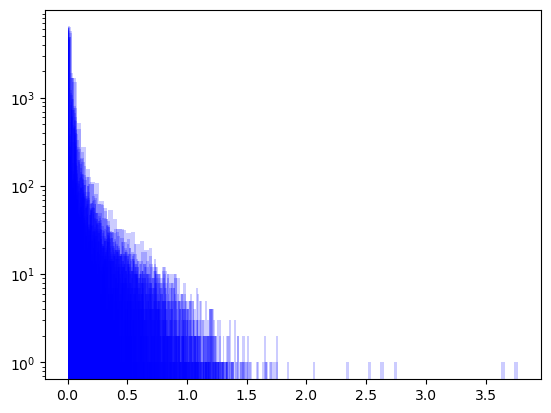

In [19]:
#sns.set_palette("bright")
for i in dmean_dt.iloc[:,3:25].columns:
    plt.hist(dmean_dt[i], bins=100, alpha=0.2, log=True, color="blue")

[                  7-Gender    10-Region      11-Country         0         1  \
 LP6005443-DNA_B06        F  WestEurasia         Iceland  0.817642  0.001244   
 LP6005442-DNA_D08        F  WestEurasia         Iceland  1.859167  0.000993   
 LP6005442-DNA_C02        M  WestEurasia        Abkhazia  1.694020  0.173579   
 LP6005442-DNA_D02        M  WestEurasia          Russia  1.564145  0.039374   
 LP6005442-DNA_F04        M  WestEurasia          Jordan  0.837158  0.035470   
 ...                    ...          ...             ...       ...       ...   
 LP6005443-DNA_A06        M  WestEurasia          Greece  1.646520  0.000868   
 LP6005441-DNA_H12        F  WestEurasia  Italy(Tuscany)  1.758880  0.004166   
 LP6005441-DNA_G10        M  WestEurasia          Russia  1.621413  0.255795   
 LP6005441-DNA_H10        F  WestEurasia          Russia  1.012276  0.104367   
 LP6005592-DNA_G01        M  WestEurasia           Yemen  1.687250  0.003080   
 
                          2    3    4 

In [20]:
from stattools.resampling import PermutationTest
PermutationTest

stattools.resampling.permutation.PermutationTest